In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage as ndi
from lenspack import peaks
from lenspack.image.transforms import starlet2d, mr_transform

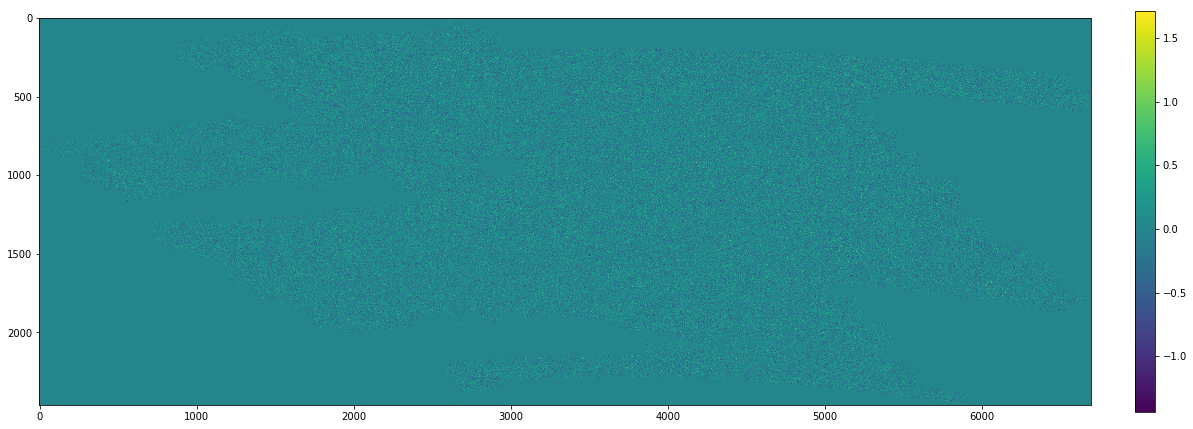

In [2]:
#load the kappa E-mode map produced by Axel
kappaE=fits.getdata('P3_kappaE_0.4.fits')

#plot the kappa E-mode map 
plt.figure(figsize=(20,20))
ax = plt.gca()
im = ax.imshow(kappaE)
plt.colorbar(im,fraction=0.018, pad=0.04)

In [3]:
#extract a square patch without holes as first test 
kappa_first_test=kappaE[500:1012,3700:4212]

#galaxy number density in gal/arcmin^2
n_gal=7 

#pixel size in arcmin
pix_arcmin=0.4

#compute shape noise for CFIS
shape_noise=0.44
sigma_noise_CFIS=shape_noise/(np.sqrt(n_gal)*pix_arcmin)
noise_CFIS_z05=sigma_noise_CFIS*np.random.randn(512, 512)

In [4]:
noise_map = np.load('/Users/vajani/Desktop/CFIS/noise_z05_CFIS.npy', mmap_mode='r')[15]

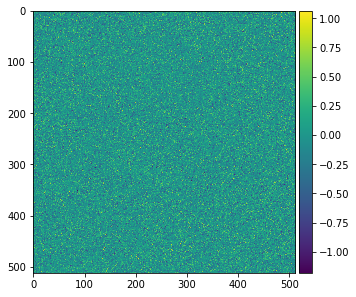

In [5]:
#plot the squared patch
plt.figure(figsize=(5,5))
plt.imshow(kappa_first_test)
ax = plt.gca()
im = ax.imshow(kappa_first_test)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [6]:
#load the galaxy density distribution
n_z=np.loadtxt('/Users/vajani/Desktop/CFIS/nz.txt')

Text(0, 0.5, 'n(z)')

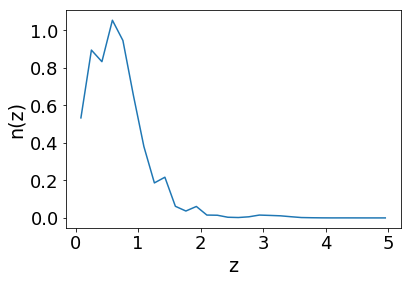

In [7]:
#plot the galaxy density distribution
plt.plot(n_z[:,0],n_z[:,1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('z', fontsize=19)
plt.ylabel('n(z)', fontsize=19)

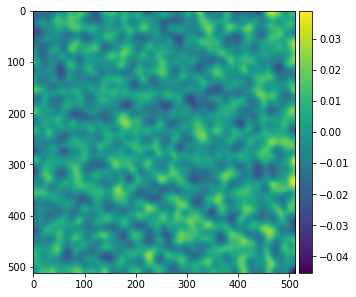

In [8]:
#smooth the map with Gaussian kernel
precision_Peaks=3/pix_arcmin
kappa_noisy_smoothed=ndi.gaussian_filter(kappa_first_test, precision_Peaks)

#plot smoothed map with Gaussian kernel
plt.figure(figsize=(5,5))
ax = plt.gca()
im = ax.imshow(kappa_noisy_smoothed)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

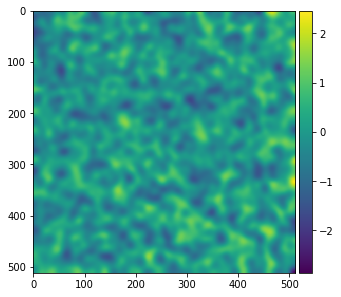

In [9]:
#compute S/N
snr=kappa_noisy_smoothed/np.std(ndi.gaussian_filter(noise_CFIS_z05, precision_Peaks))

#plot S/N map
plt.figure(figsize=(5,5))
ax = plt.gca()
im = ax.imshow(snr)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [10]:
#compute single-Gaussian peak counts
n_bins=41
thresholds_kappa=np.linspace(np.min(kappa_noisy_smoothed),np.max(kappa_noisy_smoothed),n_bins+1)
#thresholds_kappa=np.linspace(-0.06,0.06,42)
peak_counts, bins = peaks.peaks_histogram(kappa_noisy_smoothed,thresholds_kappa)

In [11]:
bins_centers=0.5*(bins[:-1]+bins[1:])
print(len(bins_centers))

41


Text(0, 0.5, '#peak counts')

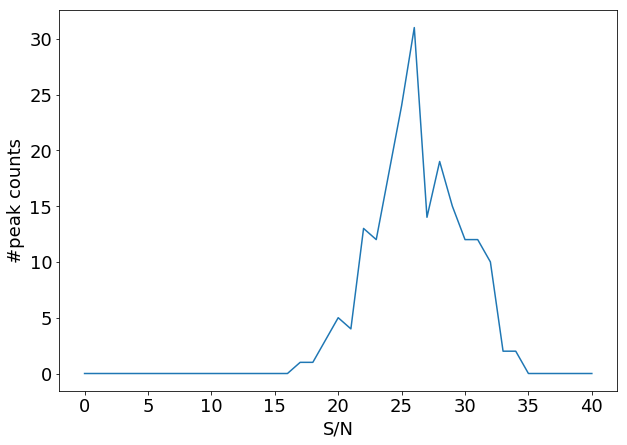

In [12]:
#plot single-Gaussian peak counts
plt.figure(figsize=(10,7))
plt.plot(peak_counts)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('S/N', fontsize=18)
plt.ylabel('#peak counts', fontsize=18)

In [13]:
np.save('fiducial_peaks_Ksmoothed_single_gaussian.npy', peak_counts)

In [14]:
#compute starlet peak counts
st = starlet2d(snr, nscales=6)

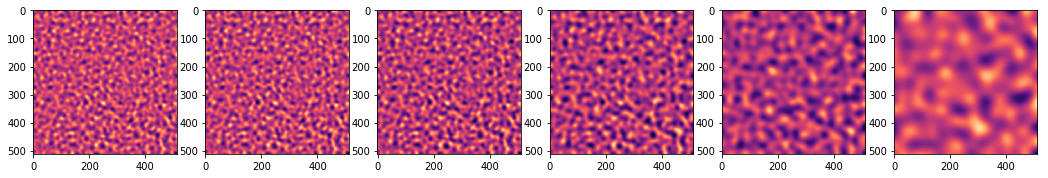

In [15]:
#plot starlet decomposition of the map
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(18, 4))
ax1.imshow(st[0], cmap='magma')
ax2.imshow(st[1], cmap='magma')
ax3.imshow(st[2], cmap='magma')
ax4.imshow(st[3], cmap='magma')
ax5.imshow(st[4], cmap='magma')
ax6.imshow(st[5], cmap='magma')